## TASK #2 - To Explore Supervised Machine Learning


# The problem statement :-


In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.What will be predicted score if a student study for 9.25 hrs in a day?


#  Simple Linear Regression :-

Simple Linear Regression (or SLR) is the simplest model in machine learning. It models the linear relationship between the independent and dependent variables.

In this task, there is one independent or input variable which represents the Hours data and is denoted by X. Similarly, there is one dependent or output variable which represents the Scores data and is denoted by Y. We want to build a linear relationship between these variables. This linear relationship can be modelled by mathematical equation of the form:-

         Y = β0   + β1*X    -------------   (1)


In this equation, X and Y are called independent and dependent variables respectively,

β1 is the coefficient for independent variable and

β0 is the constant term.

β0 and β1 are called parameters of the model.

For simplicity, we can compare the above equation with the basic line equation of the form:-

           y = ax + b       ----------------- (2)

We can see that

slope of the line is given by, a = β1, and

intercept of the line by b = β0.

In this Simple Linear Regression model, we want to fit a line which estimates the linear relationship between X and Y. So, the question of fitting reduces to estimating the parameters of the model β0 and β1.

In [31]:
#importing libraries 

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [32]:

# Reading data 

url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [33]:
# View the dimensions of df

print(df.shape)

(25, 2)


In [34]:
# View the top 5 rows of df

print(df.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [35]:
# View descriptive statistics

print(df.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


# Independent and Dependent Variables

# Independent variable:

Independent variable is also called Input variable and is denoted by X. 
In practical applications, independent variable is also called Feature variable or Predictor variable.

We can denote it as:-

Independent or Input variable (X) = Feature variable = Predictor variable

# Dependent variable:

Dependent variable is also called Output variable and is denoted by y.

Dependent variable is also called Target variable or Response variable. It can be denoted it as follows:-

Dependent or Output variable (y) = Target variable = Response variable

In [36]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

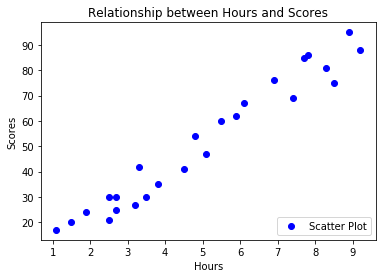

In [37]:
# plotting a scatterplot between X and Y to visualize the relationship between X and y.

plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between Hours and Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.show()

In [38]:
# printing the shape of X and Y

print(X.shape)
print(y.shape)

(25, 1)
(25,)


# Reshaping X and Y

Since we are working with only one feature variable, so we need to reshape using Numpy reshape() method.

It specifies first dimension to be -1, which means "unspecified".

Its value is inferred from the length of the array and the remaining dimensions.

In [39]:
# Reshaping X and Y

X = X.reshape(-1,1)
y = y.reshape(-1,1)

# Printing the reshaped X and Y

print(X.shape)
print(y.shape)

(25, 1)
(25, 1)


In [40]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [41]:
from sklearn.linear_model import LinearRegression  
regression = LinearRegression()  
regression.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [48]:
print(X_test) 
y_pred = regression.predict(X_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [61]:
# Model slope and intercept term

#The model slope is given by lm.coef and model intercept term is given by lm.intercept.
#The estimated model slope and intercept values are 1.60509347 and -11.16003616.
#So, the equation of the fitted regression line is
# y = 9.91065648 * x + 2.01816004

In [53]:
# Compute model slope and intercept

a = regression.coef_
b = regression.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b)

Estimated model slope, a: [[9.91065648]]
Estimated model intercept, b: (array([2.01816004]),)


In [ ]:
# So, our fitted regression line is 
#y = 9.91065648 * x + 2.01816004


In [56]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [57]:
y1_pred = regression.predict([[9.25]])
print("predicted score",y1_pred)

predicted score [[93.69173249]]


In [ ]:
# The predicted score for 9.25 hours of study is 93.69%.

In [ ]:
# There are three ways to evaluate the model performance
# 1.MAE (Mean Absolute Error)
# 2.RMSE (Root Mean Square Error)
# 3.R-Squared Value

In [58]:
# calculate Mean Absolute Error

from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


In [59]:
# Calculate and print Root Mean Square Error(RMSE)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 4.6474


In [60]:
# Calculate and print r2_score

from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.9455


In [ ]:
# The RMSE value has been found to be 4.64. It means the standard deviation for our prediction is 4.64.
# So, sometimes we may expect the predictions to be off by more than 4.64 and sometimes less than 4.64.
# hence the model is good fit to the data.

# In business decisions, the benchmark for the R2 score value is 0.7. 
# It means if R2 score value >= 0.7, then the model is good enough to deploy on unseen data whereas if R2 score value < 0.7,
# then the model is not good enough to deploy.

# Our R2 score value has been found to be .9455. It means that this model explains 94.55 % of the variance in our dependent variable. 
# So, the R2 score value confirms that the model is good enough to deploy because it provides good fit to the data.

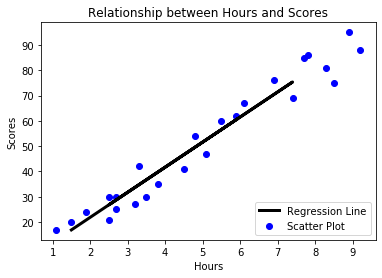

In [62]:
# Plot the Regression Line


plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Hours and Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.show()

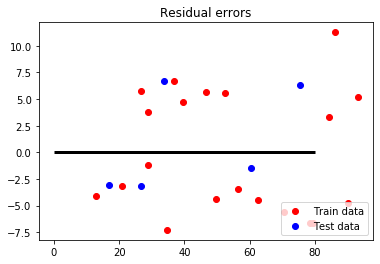

In [64]:
# Plotting residual errors

plt.scatter(regression.predict(X_train), regression.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(regression.predict(X_test), regression.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 80, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

In [66]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(regression.score(X_train,y_train)))

print("Test set score: {:.4f}".format(regression.score(X_test,y_test)))

Training set score: 0.9516
Test set score: 0.9455


### Conclusion

After Checking Underfitting and Overfitting of data.We can say that the training set score is very good.The model learns the relationship perfectly from the training data. Thus, the model performs great on the training data. It denotes  that the linear regression model does provides good fit to the data.